## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Checking on Data

In [3]:
train_data.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [4]:
test_data.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3


In [5]:
train_data.shape

(87864, 9)

In [6]:
test_data.shape

(37656, 8)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87864 entries, 0 to 87863
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               87864 non-null  object 
 1   Item_W                87864 non-null  float64
 2   Item_Type             87864 non-null  object 
 3   Item_MRP              87864 non-null  float64
 4   Outlet_ID             87864 non-null  object 
 5   Outlet_Year           87864 non-null  int64  
 6   Outlet_Size           87864 non-null  object 
 7   Outlet_Location_Type  87864 non-null  object 
 8   Sales                 87864 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.0+ MB


In [8]:
train_data.describe()

,Item_W,Item_MRP,Outlet_Year,Sales
count,87864.000000,87864.000000,87864.00000,87864.000000
mean,15.591469,151.242943,1999.87063,1911.842120
std,4.364429,59.536366,6.63429,1291.386004
min,7.992700,32.910015,1987.00000,-1229.360345
25%,10.968658,112.423337,1997.00000,959.249675
50%,15.831170,145.581473,1999.00000,1606.307877
75%,19.969936,197.110367,2004.00000,2608.057736
max,21.250000,265.214271,2009.00000,10309.283310


In [9]:
test_data.describe()

,Item_W,Item_MRP,Outlet_Year
count,37656.000000,37656.000000,37656.000000
mean,12.894124,145.880456,2000.032956
std,3.976554,61.512420,6.882847
min,4.598804,32.986813,1987.000000
25%,9.586234,102.632085,1997.000000
50%,12.164591,140.457198,1999.000000
75%,16.178979,195.207653,2004.000000
max,21.250000,265.210739,2009.000000


In [10]:
train_data.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

## Checking Correlation

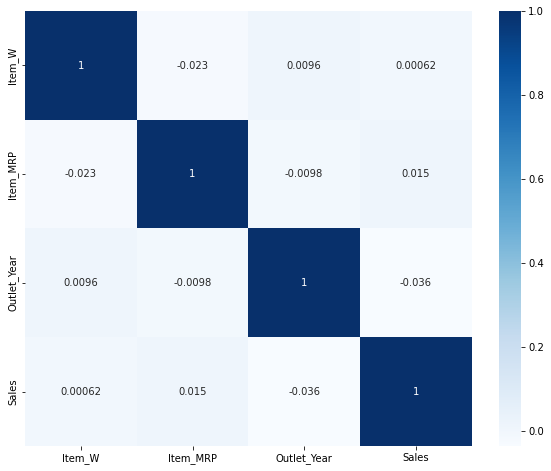

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), annot = True, cmap='Blues');

## Data Exploration

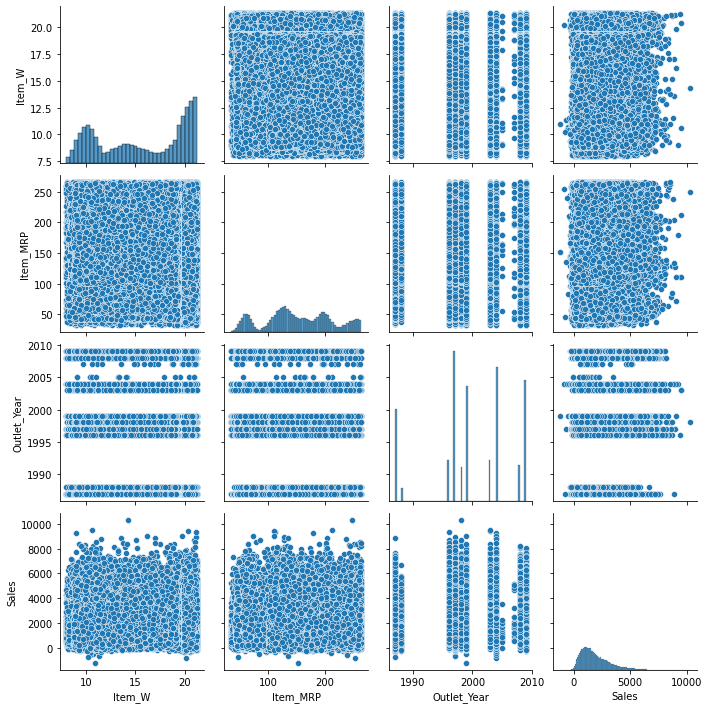

In [12]:
sns.pairplot(data = train_data);

## Treatment of Outliers

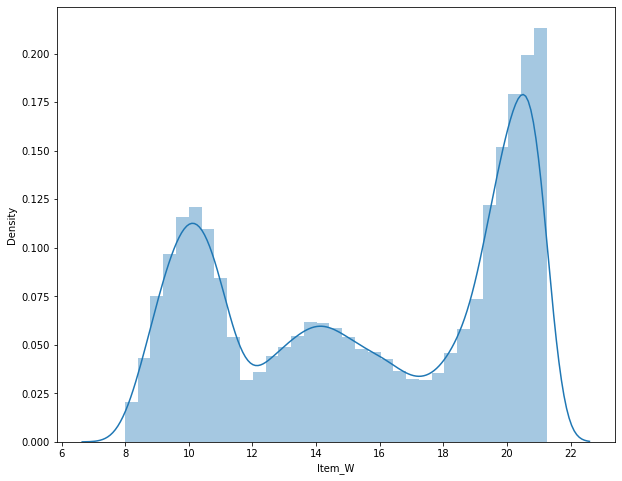

In [13]:
plt.figure(figsize=(10,8))
sns.distplot(train_data['Item_W']);

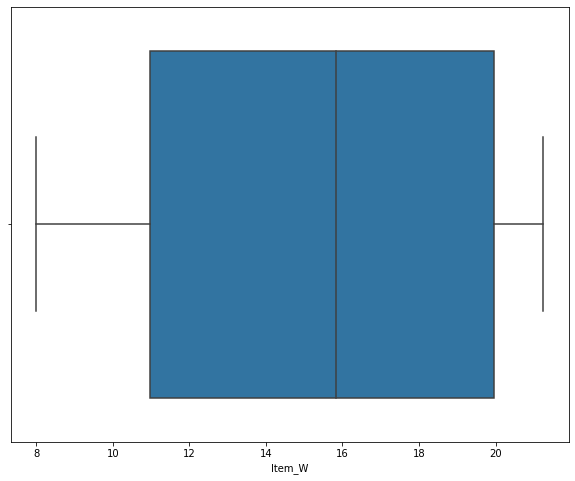

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(train_data['Item_W']);

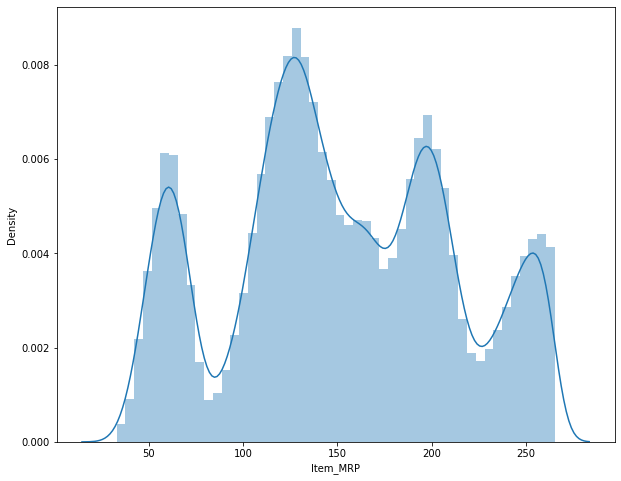

In [15]:
plt.figure(figsize=(10,8))
sns.distplot(train_data['Item_MRP']);

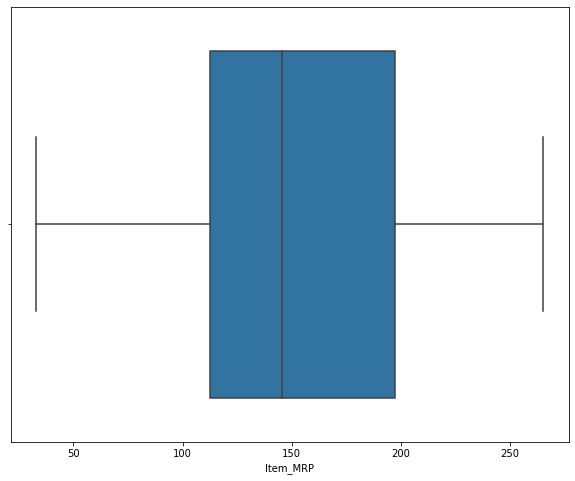

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(train_data['Item_MRP']);

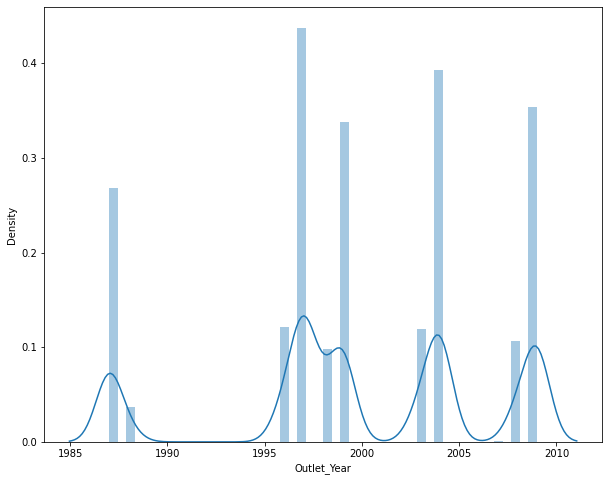

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(train_data['Outlet_Year']);

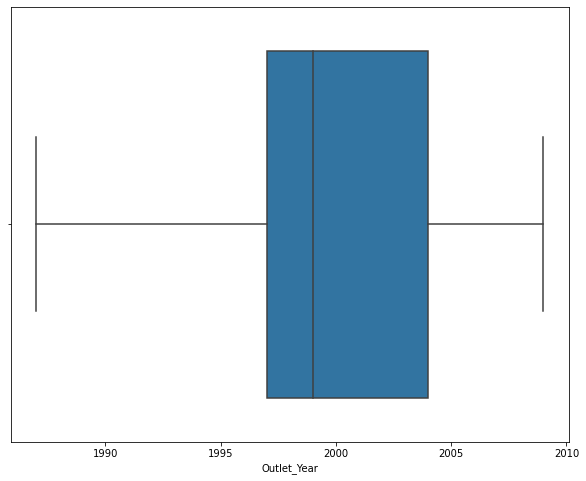

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(train_data['Outlet_Year']);

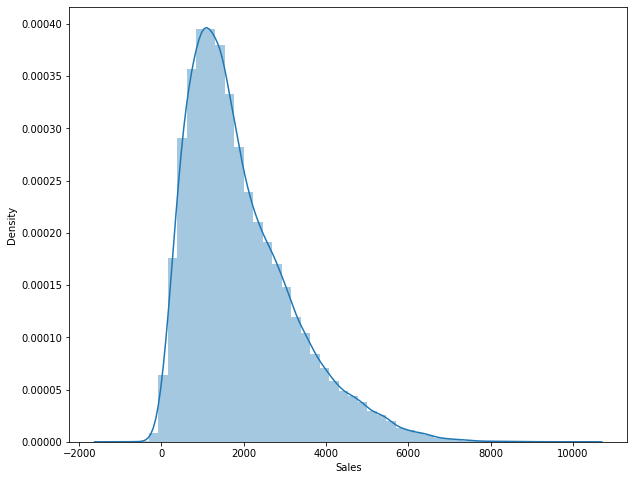

In [19]:
plt.figure(figsize=(10,8))
sns.distplot(train_data['Sales']);

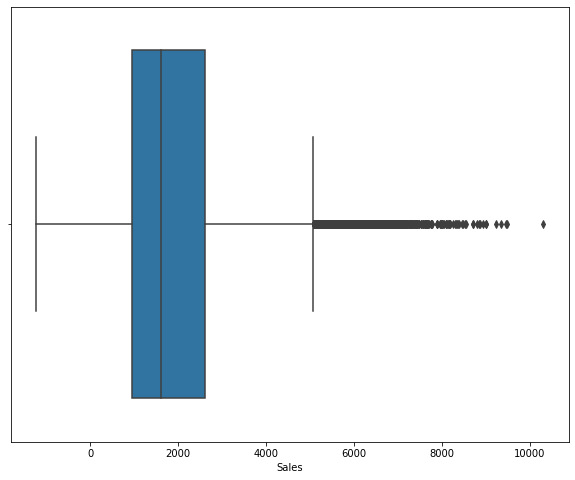

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(train_data['Sales']);

In [21]:
train_data=train_data[train_data['Sales'] < train_data['Sales'].quantile(.90)]

In [22]:
train_data=train_data[train_data['Sales'] > train_data['Sales'].quantile(.01)]

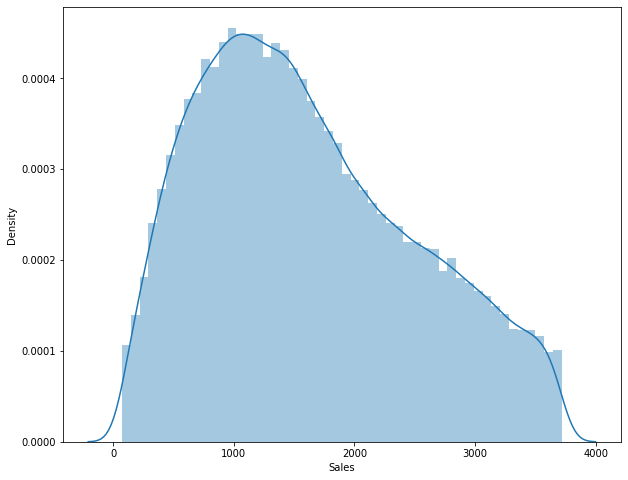

In [23]:
plt.figure(figsize=(10,8))
sns.distplot(train_data['Sales']);

In [24]:
train_data.shape

(78286, 9)

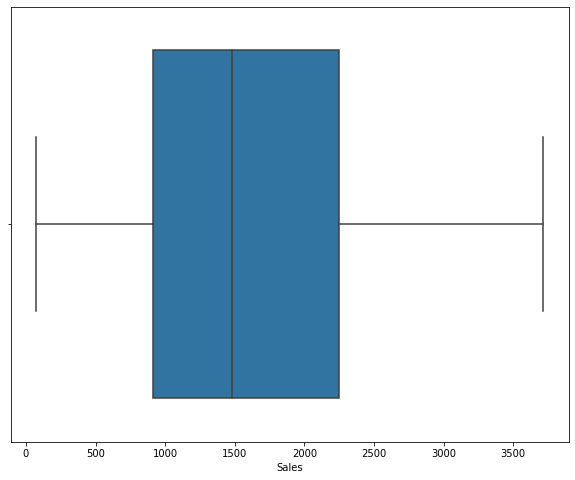

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(train_data['Sales']);

## Model Building

In [26]:
train_data['Item_ID'].nunique()

895

It has 895 unique values so i am considering to drop the column as it may increase 895 new columns in original Dataframe

In [27]:
train_data['Item_Type'].nunique()

16

In [28]:
train_data['Outlet_ID'].nunique()

5

In [29]:
train_data['Outlet_Size'].nunique()

3

In [30]:
train_data['Outlet_Location_Type'].nunique()

3

## Assigning Training Data

In [31]:
x = train_data.drop('Item_ID', axis = 1)

In [32]:
x = x.drop('Sales', axis = 1)

In [33]:
x = pd.get_dummies(x, drop_first=True)

In [34]:
x = x.values

In [35]:
x.shape

(78286, 26)

## Assigning Test Data

In [36]:
x_test = test_data.drop('Item_ID', axis = 1)

In [37]:
x_test

,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3
1,10.434425,Household,263.600449,OUT018,1987,High,Tier 3
2,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1
3,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2
4,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3
...,...,...,...,...,...,...,...
37651,6.380000,Dairy,178.334400,OUT018,2009,Medium,Tier 3
37652,6.650000,Canned,150.073400,OUT018,2009,Medium,Tier 3
37653,5.655000,Soft Drinks,147.510200,OUT046,1997,Small,Tier 1
37654,6.675000,Snack Foods,92.946200,OUT018,2009,Medium,Tier 3


In [38]:
x_test = pd.get_dummies(x_test, drop_first=True)

In [39]:
x_test = x_test.values

In [40]:
x_test.shape

(37656, 26)

## Assigning Target Column

In [41]:
y = train_data[['Sales']]

### Here i am spliting the training data into train and validation to know the accuracy of my model

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, random_state=42)

## Scaling the data or preprocessing

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
y_train_scaled = scaler.fit_transform(y_train)
x_val_scaled = scaler.fit_transform(x_val)
y_val_scaled = scaler.fit_transform(y_val)

In [44]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)
print(x_val_scaled.shape)

(62628, 26)
(62628, 1)
(15658, 26)


## Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [46]:
lr.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [47]:
y_pred = lr.predict(x_val_scaled)

## Mean Absolute Error

In [48]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_val_scaled,y_pred))

MAE 0.8244102293876749


## Mean Square Error

In [49]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_val_scaled,y_pred))

MSE 0.9875543915726795


## Root Mean Squared Error

In [50]:
print("RMSE",np.sqrt(mean_squared_error(y_val_scaled,y_pred)))

RMSE 0.9937577127110409


## R square

In [51]:
from sklearn.metrics import r2_score
r2 = r2_score(y_val_scaled,y_pred)
print(r2)

0.012445608427320454


## Now predicting the final Test Data

In [52]:
y_pred_final = lr.predict(x_test_scaled)

## Inverse transforming the scaled values

In [53]:
y_pred_actual = scaler.inverse_transform(y_pred_final)
y_pred_actual

array([[1718.75975923],
       [1558.56276022],
       [1557.59643741],
       ...,
       [1636.34554328],
       [1456.90199142],
       [1456.69616026]])

### Rounding up to 3 digits after decimals

In [54]:
y_pred_actual = np. around(y_pred_actual,3)

In [55]:
y_pred_actual

array([[1718.76 ],
       [1558.563],
       [1557.596],
       ...,
       [1636.346],
       [1456.902],
       [1456.696]])

## Making a Dataframe and storing the Predicted Values

In [56]:
submission = pd.DataFrame(data = y_pred_actual, index = None, columns = ['Sales'])

In [57]:
submission

,Sales
0,1718.760
1,1558.563
2,1557.596
3,1534.039
4,1482.041
...,...
37651,1410.403
37652,1475.738
37653,1636.346
37654,1456.902


## Getting the CSV as output

In [58]:
submission.to_csv('submission.csv',index=False, header=True)